In [1]:
import pandas as pd

df = pd.read_csv('cutomer_feedback.csv', encoding='cp1252')
df.head()


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


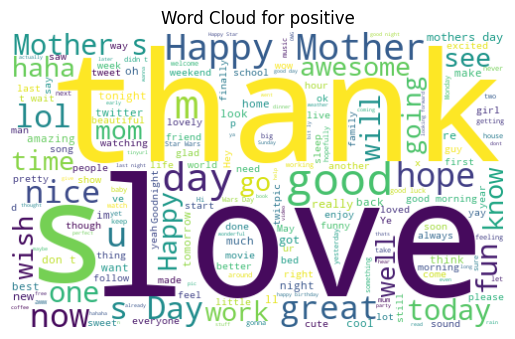

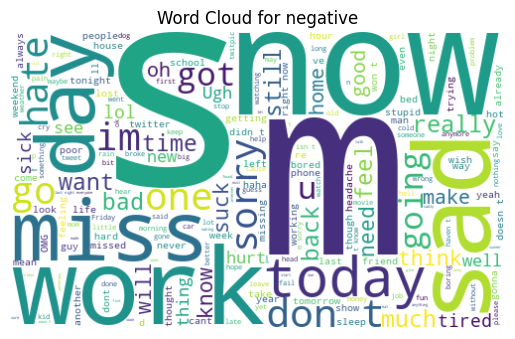

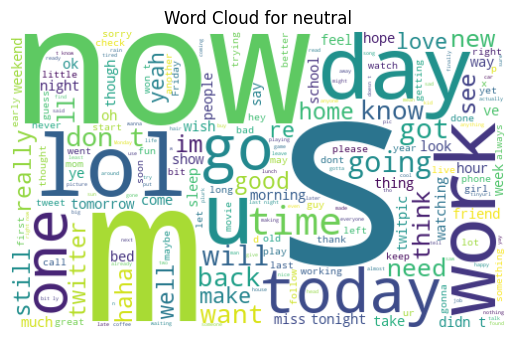

In [10]:
pip install wordcloud
from wordcloud import WordCloud

for s in ["positive", "negative", "neutral"]:
    text = " ".join(df[df.sentiment == s]["text"].astype(str))
    wc = WordCloud(width=500, height=300, background_color="white").generate(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Word Cloud for {s}")
    plt.axis("off")
    plt.show()


In [2]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if isinstance(text, str) is False:
        return ""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hayat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df["clean_text"] = df["text"].apply(clean_text)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["sentiment"]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


In [6]:
from sklearn.metrics import classification_report

preds = model.predict(X)
print(classification_report(y, preds))


              precision    recall  f1-score   support

    negative       0.81      0.68      0.74      7781
     neutral       0.70      0.82      0.76     11118
    positive       0.83      0.76      0.79      8582

    accuracy                           0.76     27481
   macro avg       0.78      0.75      0.76     27481
weighted avg       0.77      0.76      0.76     27481



In [7]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [8]:
import joblib

model = joblib.load("model.pkl")
vectorizer = joblib.load("vectorizer.pkl")


In [9]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    X = vectorizer.transform([cleaned])
    return model.predict(X)[0]


In [14]:
print(predict_sentiment("this product is really good"))
print(predict_sentiment("I hate this"))
print(predict_sentiment("This is okay"))

positive
negative
neutral
